In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [21]:
df = pd.read_csv("/Users/aleksandr/Desktop/ Курсы/UNZIP_ME_FOR_NOTEBOOKS_ML_RUS_V6/DATA/AMES_Final_DF.csv")

In [5]:
df.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
2,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
3,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,1,0,0,0,1,0
4,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0


Допустим, есть набор данных

In [7]:
!pip install arch
from arch.bootstrap import IIDBootstrap, IndependentSamplesBootstrap

In [ ]:
Возьмем другой набор, предназначенный для лог. регрессии, первый странный

In [ ]:
def bootstrap_arch(data, n_iterations=1000, confidence_level=0.95):
    bs = IIDBootstrap(data)
    stats = list()
    for _ in range(n_iterations):
        sample = bs.draw()[0]
        stat = np.mean(sample)
        stats.append(stat)
    lower, upper = np.percentile(stats, [100 * ((1-confidence_level)/2), 100 * (1-(1-confidence_level)/2)])
    return lower, upper

In [9]:
df_2 = pd.read_csv("/Users/aleksandr/Desktop/ Курсы/UNZIP_ME_FOR_NOTEBOOKS_ML_RUS_V6/DATA/heart.csv")
df_2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
df_2upd = df_2[["age", "trestbps", "chol", "thalach"]]
df_2upd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       303 non-null    int64
 1   trestbps  303 non-null    int64
 2   chol      303 non-null    int64
 3   thalach   303 non-null    int64
dtypes: int64(4)
memory usage: 9.6 KB


Итак, есть готовые данные

trestbps - resting blood pressure - давление в состоянии покоя

chol - уровень холистерина в крови, в mg/dl

thalach - максимальный пульс


In [13]:
df_2upd.describe()

,age,trestbps,chol,thalach
count,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865
std,9.082101,17.538143,51.830751,22.905161
min,29.000000,94.000000,126.000000,71.000000
25%,47.500000,120.000000,211.000000,133.500000
50%,55.000000,130.000000,240.000000,153.000000
75%,61.000000,140.000000,274.500000,166.000000
max,77.000000,200.000000,564.000000,202.000000


In [ ]:
Рассмотрим trestbps - resting blood pressure - давление в состоянии покоя

In [30]:
data_trestbps = df_2upd['trestbps'].to_numpy()
mean = np.mean(data_trestbps)
std = np.std(data_trestbps, ddof=1)
n = len(data_trestbps)

Найдем дов. интервал

In [33]:
confidence_level = 0.95
degrees_freedom = n - 1
critical_value = stats.t.ppf((1 + confidence_level) / 2, degrees_freedom)

margin_of_error = critical_value * (std / np.sqrt(n))
confidence_interval = (mean - margin_of_error, mean + margin_of_error)

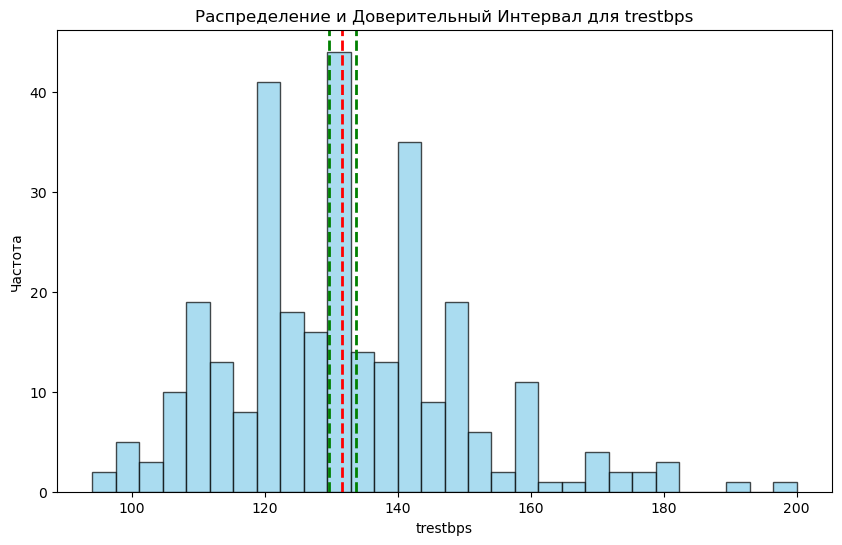

In [34]:
plt.figure(figsize=(10, 6))
plt.hist(data_trestbps, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2)
plt.axvline(confidence_interval[0], color='green', linestyle='dashed', linewidth=2)
plt.axvline(confidence_interval[1], color='green', linestyle='dashed', linewidth=2)
plt.title('Распределение и Доверительный Интервал для trestbps')
plt.xlabel('trestbps')
plt.ylabel('Частота')
plt.show()

Не сраслось с норм. рапред.    :(